In [106]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [107]:
df = pd.read_excel('data/大类资产指数行情数据.xlsx',header=2)

In [108]:
df.index = df.iloc[:,0]
df = df.drop('Unnamed: 0',axis=1)
df.index = pd.to_datetime(df.index)
df.head()

,上证50,沪深300,中证500,中证1000,南华商品指数,标普高盛商品全收益指数,中债-综合财富(1年以下)指数,中债-综合财富(3-5年)指数,中债-综合财富(7-10年)指数,货币基金
Unnamed: 0,,,,,,,,,,
1990-12-19,0.0,0.0,0.0,0.0,0.0,2369.70,0.0,0.0,0.0,0.0
1990-12-20,0.0,0.0,0.0,0.0,0.0,2353.99,0.0,0.0,0.0,0.0
1990-12-21,0.0,0.0,0.0,0.0,0.0,2341.21,0.0,0.0,0.0,0.0
1990-12-24,0.0,0.0,0.0,0.0,0.0,2343.10,0.0,0.0,0.0,0.0
1990-12-25,0.0,0.0,0.0,0.0,0.0,2343.10,0.0,0.0,0.0,0.0


In [109]:
df = df[['沪深300','南华商品指数','货币基金','中债-综合财富(3-5年)指数']]

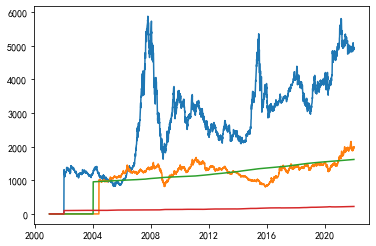

In [110]:
plt.figure()
plt.plot(df['2001-01-04':'2021-12-31'])

In [111]:
df1 = pd.DataFrame()
df = df['2001':'2021']
count = 100

for j in range(0,4):
    num = (df.iloc[1:,j]/df.shift(1).iloc[1:,j] - 1)*100
    da = pd.DataFrame((num))
    df1 = pd.concat([df1,da],axis=1)

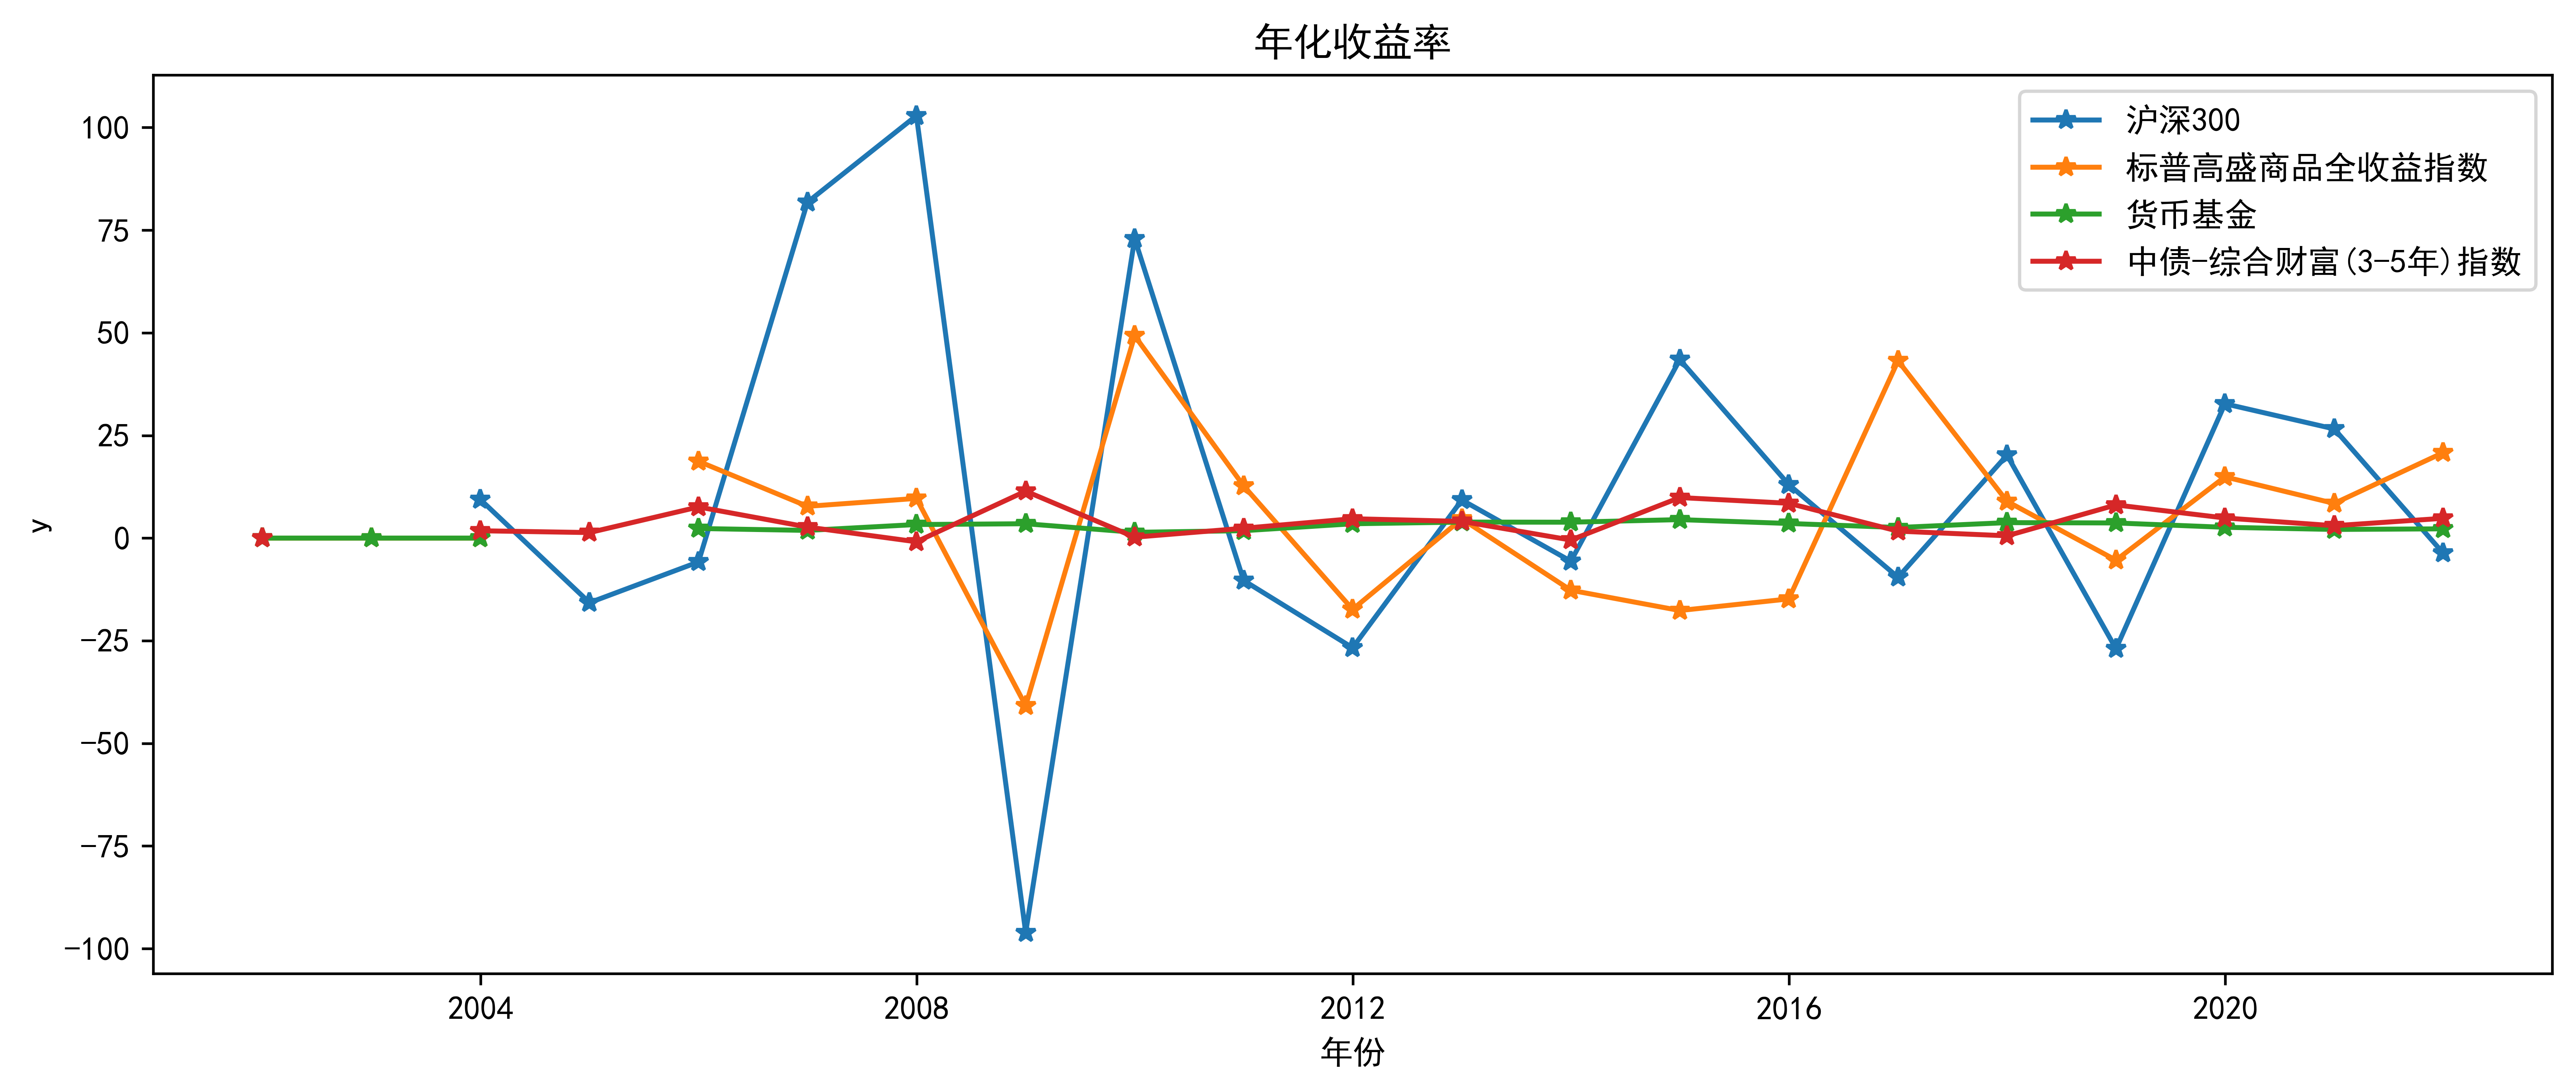

In [112]:
plt.figure(dpi=600,figsize=(13,5))
plt.plot(df1.resample('Y').sum(),marker='*',linestyle='-')
plt.legend(('沪深300','标普高盛商品全收益指数','货币基金','中债-综合财富(3-5年)指数'))
plt.title('年化收益率')
plt.xlabel('年份')
plt.ylabel('y')
plt.savefig('数据/年化收益率.png')
plt.show()

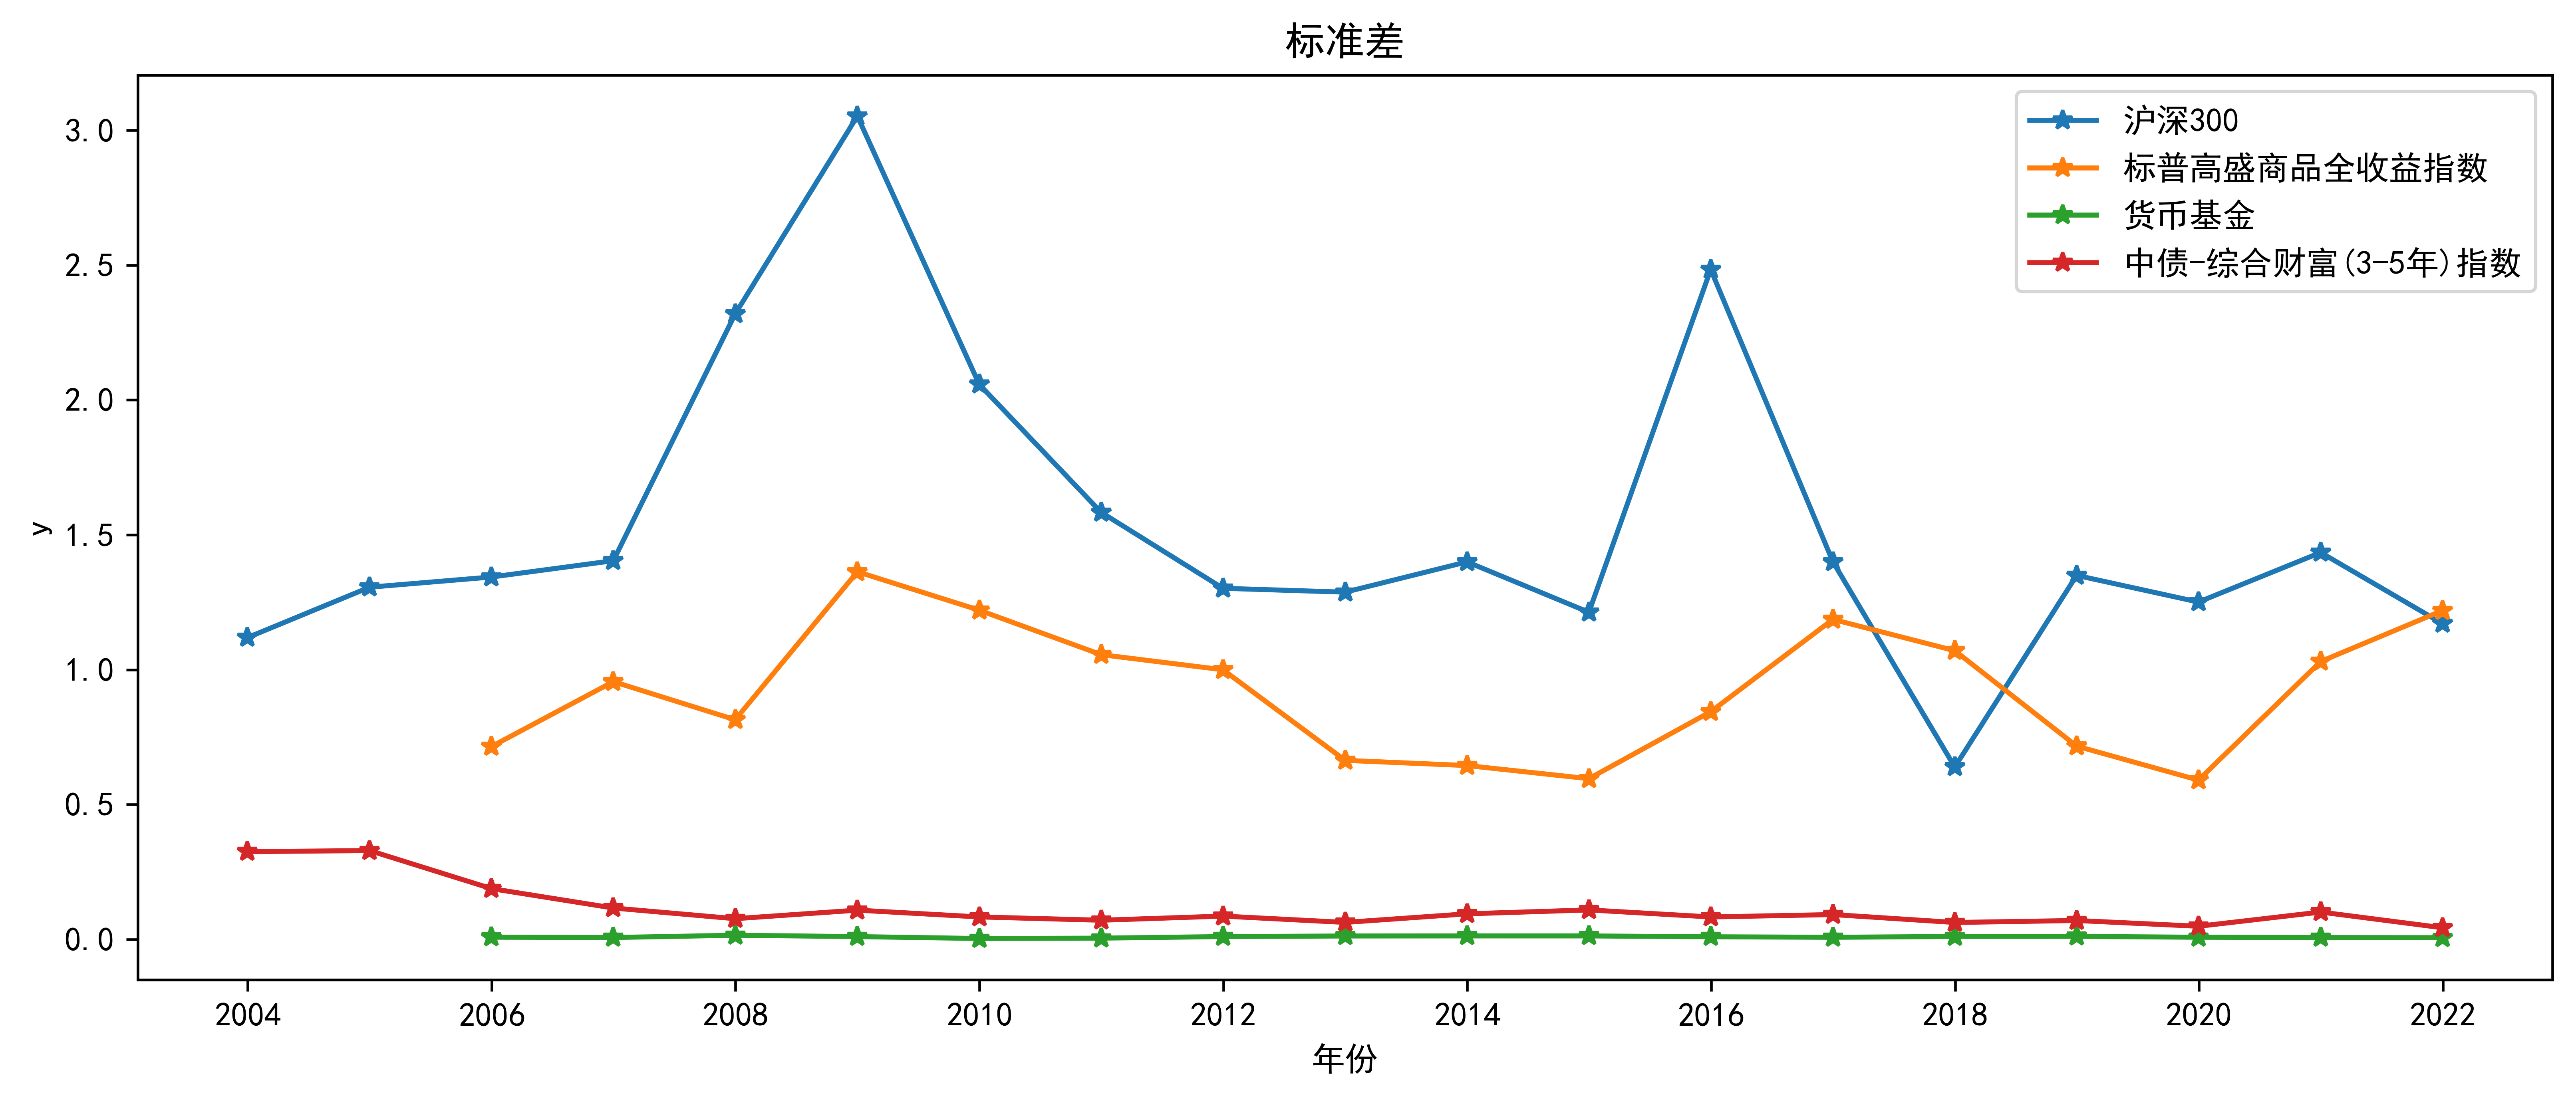

In [113]:
plt.figure(dpi=600,figsize=(13,5))
plt.plot(df1.resample('Y').std(),marker='*',linestyle='-')
plt.legend(('沪深300','标普高盛商品全收益指数','货币基金','中债-综合财富(3-5年)指数'))
plt.title('标准差')
plt.xlabel('年份')
plt.ylabel('y')
plt.savefig('数据/标准差.png')
plt.show()

In [114]:
num1 = df1.resample('Y').sum()
num2 = df1.resample('Y').std()
num3 = df1.resample('Y').sum()
for i in range(0,4):
    num3.iloc[:,i] = (num1.iloc[:,i] - 3)/num2.iloc[:,i]

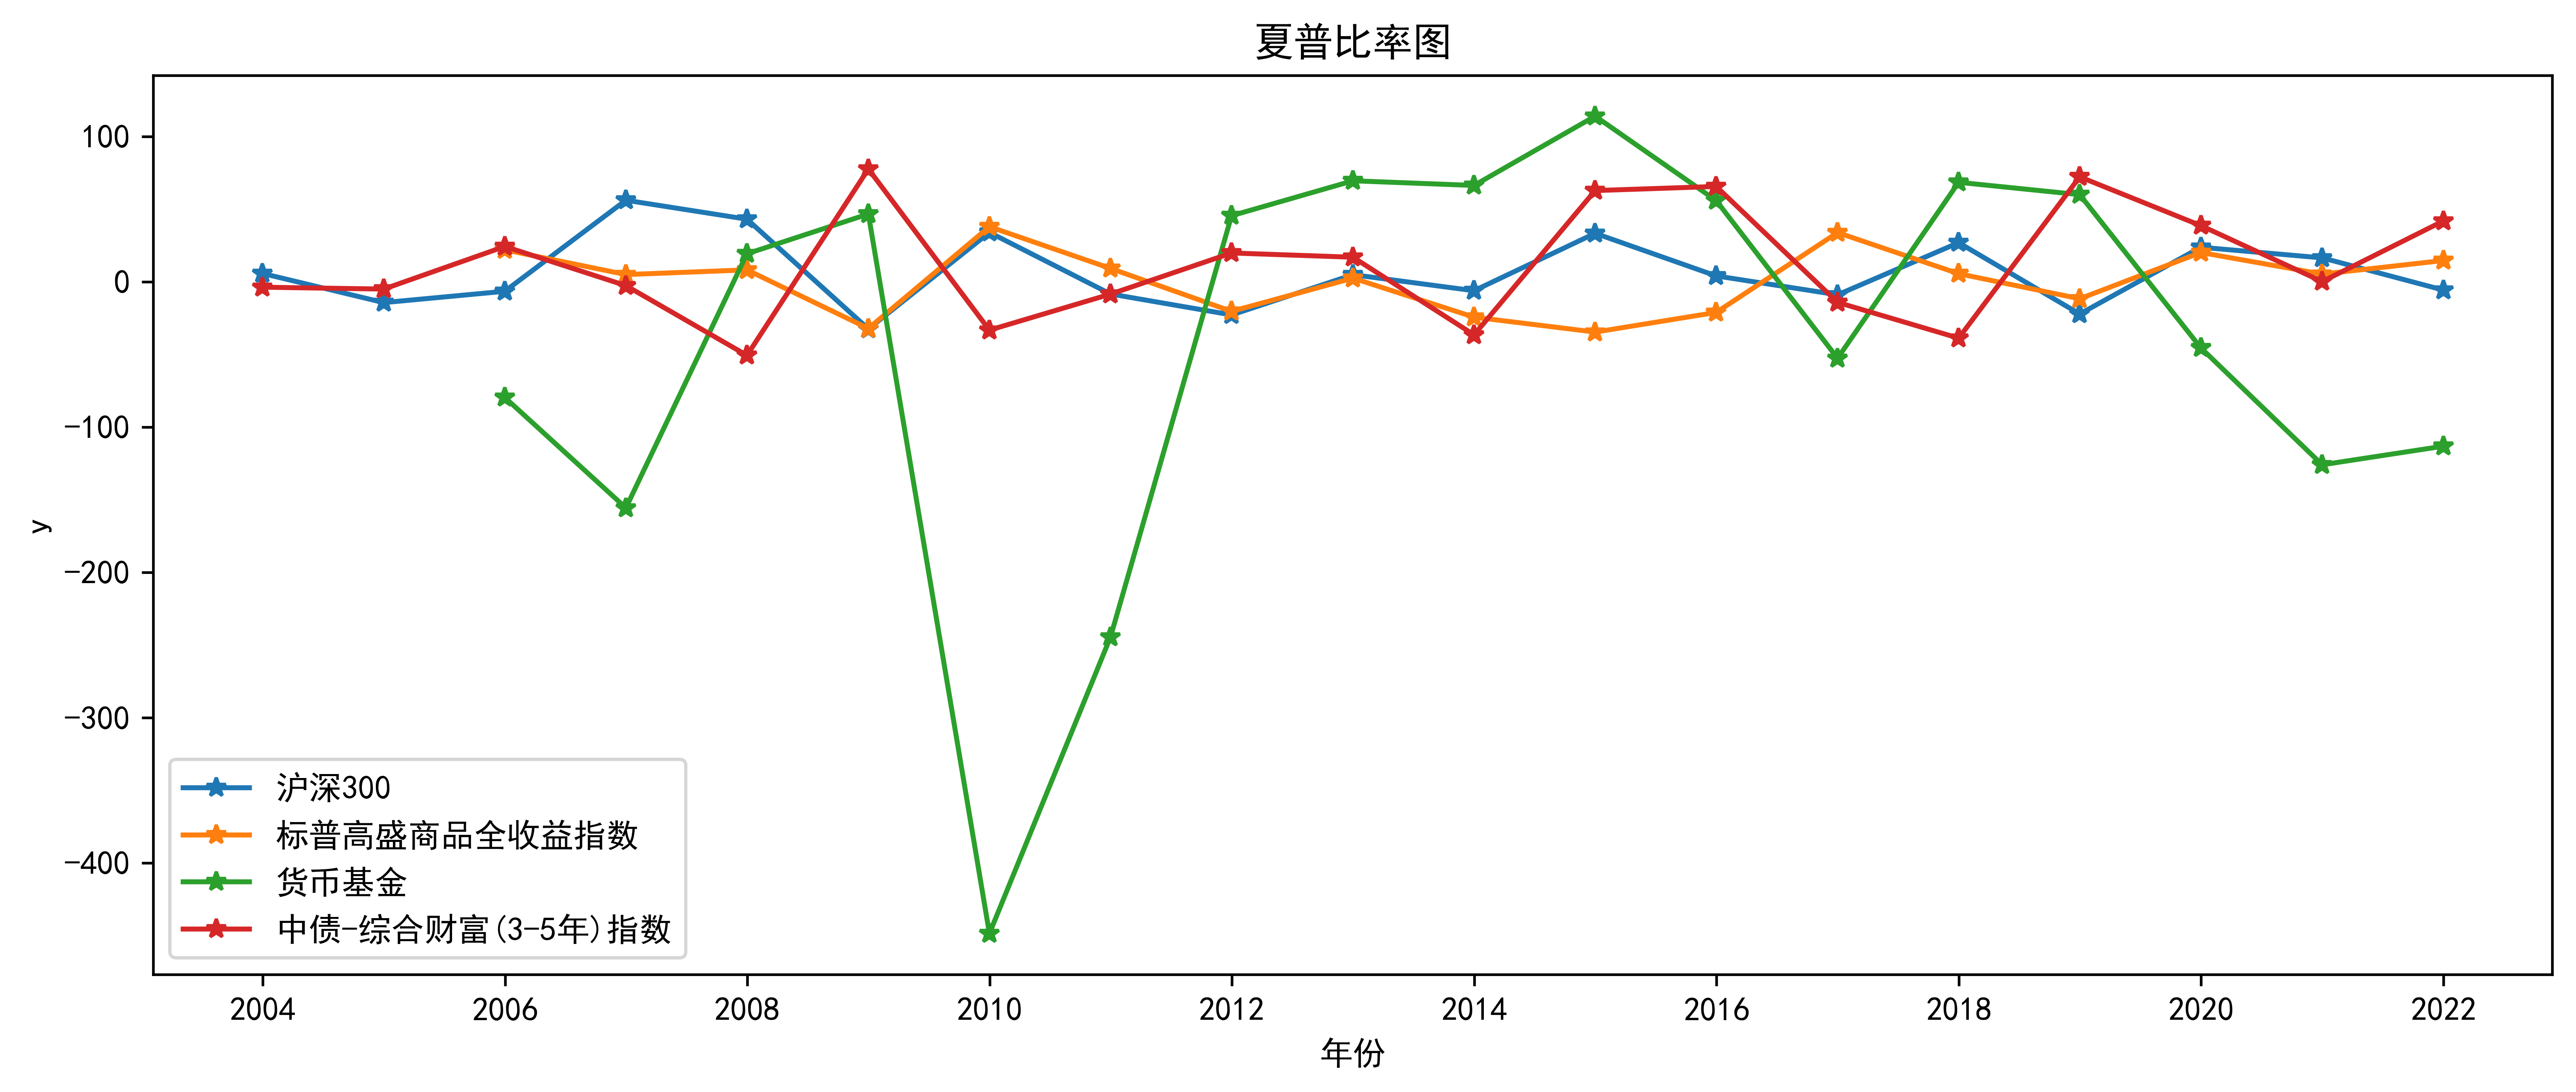

In [115]:
plt.figure(dpi=600,figsize=(13,5))
plt.plot(num3,marker='*',linestyle='-')
plt.legend(('沪深300','标普高盛商品全收益指数','货币基金','中债-综合财富(3-5年)指数'))
plt.title('夏普比率图')
plt.xlabel('年份')
plt.ylabel('y')
plt.savefig('数据/夏普比率图')
plt.show()

In [116]:
num1 = num1.fillna(0)
num2 = num2.fillna(0)
num3 = num3.fillna(0)
num1.to_excel('数据/年收益率.xlsx')
num2.to_excel('数据/年收益率方差.xlsx')
num3.to_excel('数据/夏普比率.xlsx')